# Creando Grafos

In [14]:
from graphviz import Digraph

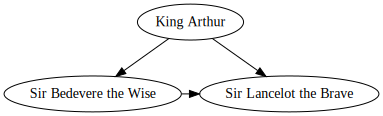

In [15]:
dot = Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
dot

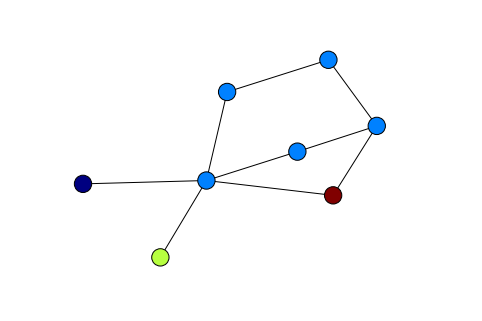

In [81]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()

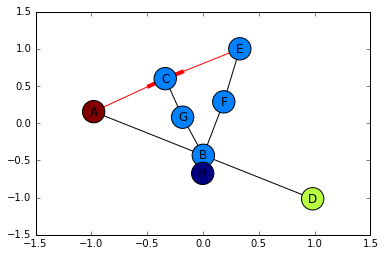

In [82]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

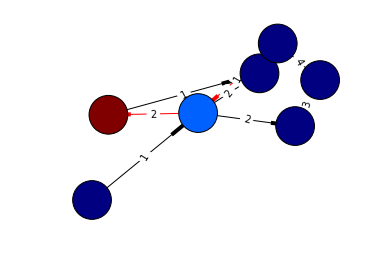

In [83]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.DiGraph()

G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)


val_map = {'A': 1.0,
                   'D': 0.5714285714285714,
                              'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
pylab.show()

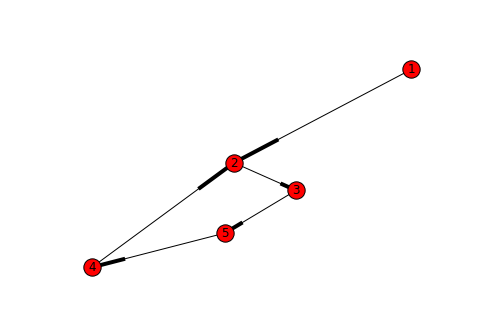

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()
g.add_nodes_from([1,2,3,4,5])
g.add_edge(1,2)
g.add_edge(4,2)
g.add_edge(3,5)
g.add_edge(2,3)
g.add_edge(5,4)

nx.draw(g,with_labels=True)
plt.draw()
plt.show()

In [85]:
A= np.array([ [0, 1, 1, 1, 1, 1],
   [1, 0, 1, 1, 1, 1],
   [1, 1, 0, 1, 1, 1],
   [1, 1, 1, 0, 1, 1],
   [1, 1, 1, 1, 0, 1],
   [1, 1, 1, 1, 1, 0] ])

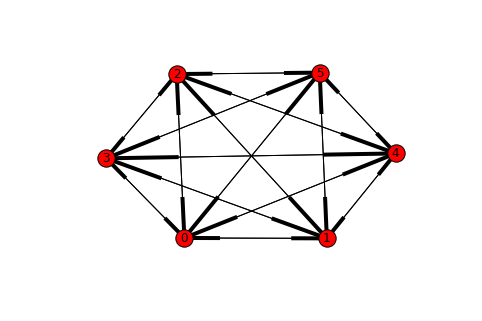

In [86]:
G = nx.DiGraph(A)
nx.draw(G,with_labels=True)
plt.show()

In [54]:
G.out_degree(),G.in_degree()

({0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5}, {0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5})

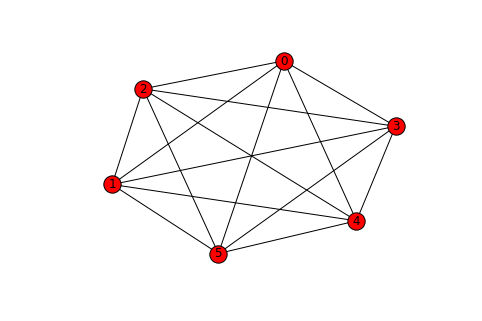

In [55]:
G = nx.from_numpy_matrix(np.array(A))
nx.draw(G, with_labels=True)
plt.show()

In [59]:
!pip install pygraphviz

    100% |████████████████████████████████| 133kB 646kB/s ta 0:00:01
  Running setup.py bdist_wheel for pygraphviz ... done
  Stored in directory: /Users/MichelMacSDD/Library/Caches/pip/wheels/81/03/ed/eb3b7ef51ee6527abfaf2701e222e74107b97344cfa2201881
Successfully built pygraphviz


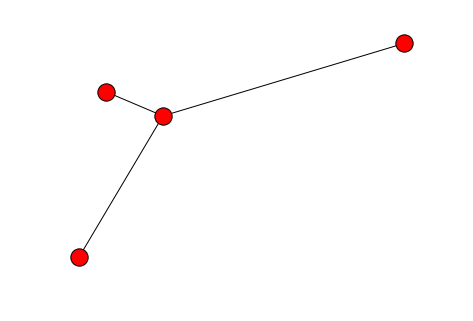

In [80]:
G = nx.Graph();
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_edge('A','B',weight=1)
G.add_edge('C','B',weight=1)
G.add_edge('B','D',weight=30)

pos = nx.spring_layout(G,scale=2)

nx.draw(G,pos,font_size=12)
plt.show()

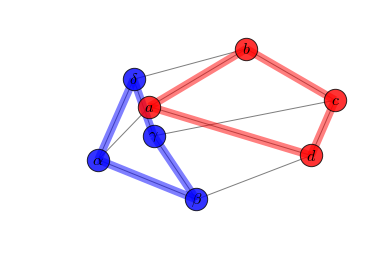

In [87]:
#!/usr/bin/env python
"""
Draw a graph with matplotlib, color by degree.

You must have matplotlib for this to work.
"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
import matplotlib.pyplot as plt

import networkx as nx

G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5,6,7],
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
#plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

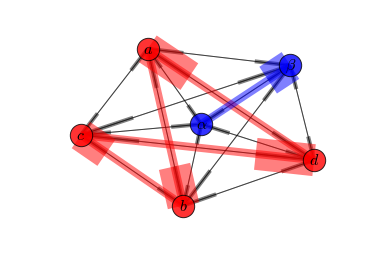

In [88]:
A= np.array([ [0, 1, 1, 1, 1, 1],
   [1, 0, 1, 1, 1, 1],
   [1, 1, 0, 1, 1, 1],
   [1, 1, 1, 0, 1, 1],
   [1, 1, 1, 1, 0, 1],
   [1, 1, 1, 1, 1, 0] ])
G = nx.DiGraph(A)
#G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5],
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5)],
                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
#labels[6]=r'$\gamma$'
#labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
#plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

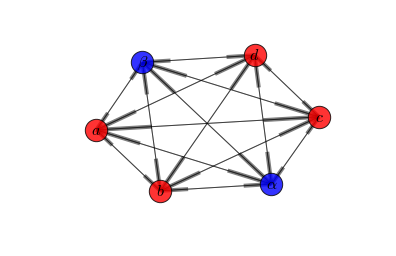

In [89]:
A= np.array([ [0, 1, 1, 1, 1, 1],
   [1, 0, 1, 1, 1, 1],
   [1, 1, 0, 1, 1, 1],
   [1, 1, 1, 0, 1, 1],
   [1, 1, 1, 1, 0, 1],
   [1, 1, 1, 1, 1, 0] ])

G = nx.DiGraph(A)
#G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

for i in pos:
    pos[i] = pos[i]+100

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5],
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
#                       width=8,alpha=0.5,edge_color='r')
#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(4,5)],
#                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
#labels[6]=r'$\gamma$'
#labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
#plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Read in graph and compute the Laplacian L ...

# Laplacian matrices are real and symmetric, so we can use eigh, 
# the variation on eig specialized for Hermetian matrices.
w, v = eigh(L) # w = eigenvalues, v = eigenvectors

x = v[:,1] 
y = v[:,2]
spectral_coordinates = {i : (x[i], y[i]) for i in range(n)}
G = nx.Graph()
G.add_edges_from(graph)

nx.draw(G, pos=spectral_coordinates)
plt.show()

NameError: name 'L' is not defined